In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/kaggle/input/kagglex-skill-dataset/train.csv")
df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,Ford,F-150 Lariat,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,11000
1,1,BMW,335 i,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,8250
2,2,Jaguar,XF Luxury,2009,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,Yes,15000
3,3,BMW,X7 xDrive40i,2022,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,63500
4,4,Pontiac,Firebird Base,2001,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,7850


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54273 entries, 0 to 54272
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            54273 non-null  int64 
 1   brand         54273 non-null  object
 2   model         54273 non-null  object
 3   model_year    54273 non-null  int64 
 4   milage        54273 non-null  int64 
 5   fuel_type     54273 non-null  object
 6   engine        54273 non-null  object
 7   transmission  54273 non-null  object
 8   ext_col       54273 non-null  object
 9   int_col       54273 non-null  object
 10  accident      54273 non-null  object
 11  clean_title   54273 non-null  object
 12  price         54273 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 5.4+ MB


In [4]:
df.describe()

,id,model_year,milage,price
count,54273.000000,54273.000000,54273.000000,5.427300e+04
mean,27136.000000,2015.091979,72746.175667,3.921844e+04
std,15667.409917,5.588909,50469.490448,7.282634e+04
min,0.000000,1974.000000,100.000000,2.000000e+03
25%,13568.000000,2012.000000,32268.000000,1.550000e+04
50%,27136.000000,2016.000000,66107.000000,2.800000e+04
75%,40704.000000,2019.000000,102000.000000,4.500000e+04
max,54272.000000,2024.000000,405000.000000,2.954083e+06


In [5]:
df.isnull().sum()

id              0
brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.shape

(54273, 13)

In [8]:
df.columns

Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')

## EDA

Before we go ahead we can drop the `id` column

In [104]:
new_df = df.drop("id", axis = 1)[:]
new_df

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,F-150 Lariat,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,11000
1,BMW,335 i,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,8250
2,Jaguar,XF Luxury,2009,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,Yes,15000
3,BMW,X7 xDrive40i,2022,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,63500
4,Pontiac,Firebird Base,2001,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,7850
...,...,...,...,...,...,...,...,...,...,...,...,...
54268,BMW,X6 xDrive50i,2017,29000,Gasoline,445.0HP 4.4L 8 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Brown,None reported,Yes,29000
54269,Audi,A4 2.0T Premium,2015,94634,E85 Flex Fuel,220.0HP 2.0L 4 Cylinder Engine Flex Fuel Capab...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,6500
54270,Porsche,Cayenne S,2013,40989,Gasoline,420.0HP 3.6L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Black,At least 1 accident or damage reported,Yes,18950
54271,Porsche,911 Carrera 4 GTS,2023,1518,Gasoline,4.0L H6 24V GDI DOHC,8-Speed Automatic with Auto-Shift,Beige,Brown,None reported,Yes,194965


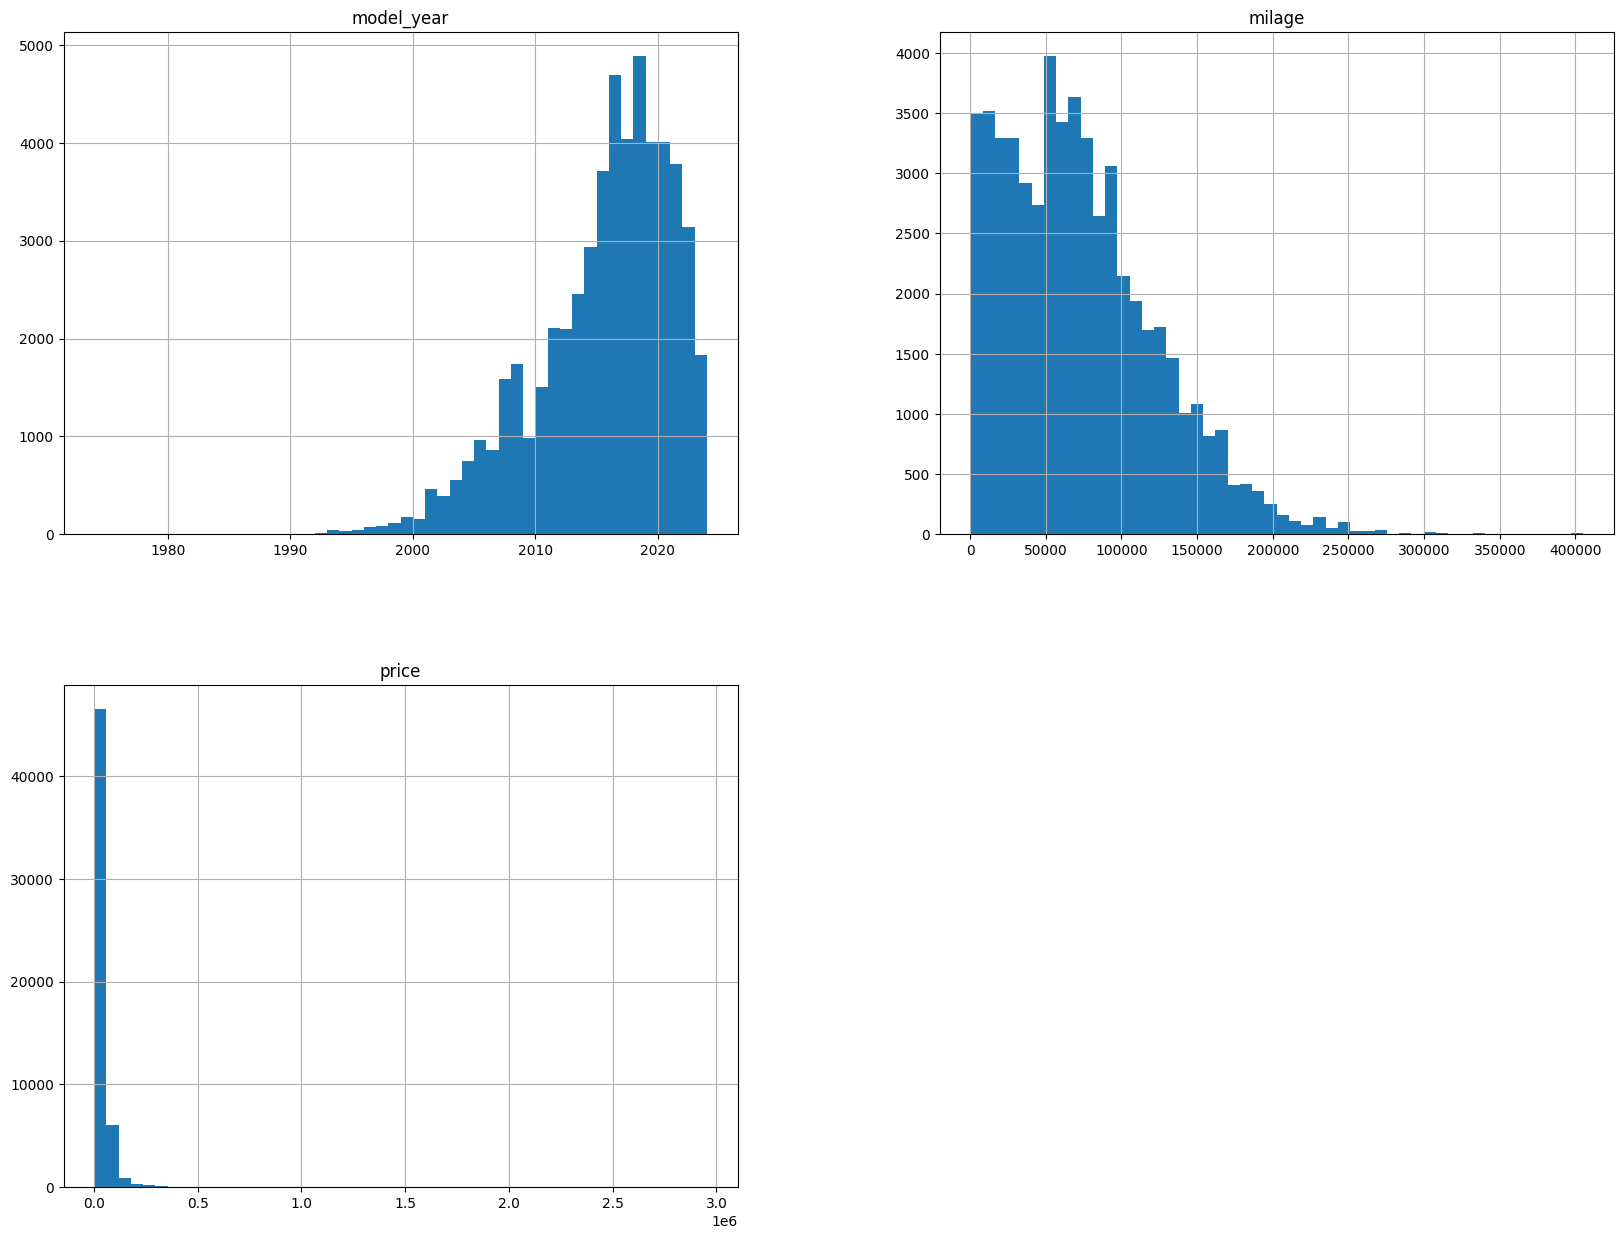

In [105]:
new_df.hist(bins = 50, figsize=(20, 15));

In [106]:
corr_matrix = new_df.corr(numeric_only = True)
corr_matrix["price"].sort_values(ascending = False)

price         1.000000
model_year    0.216150
milage       -0.248927
Name: price, dtype: float64

As we can see here the price is affected by year of launch and the milage. Low milage and new cars have higher prices

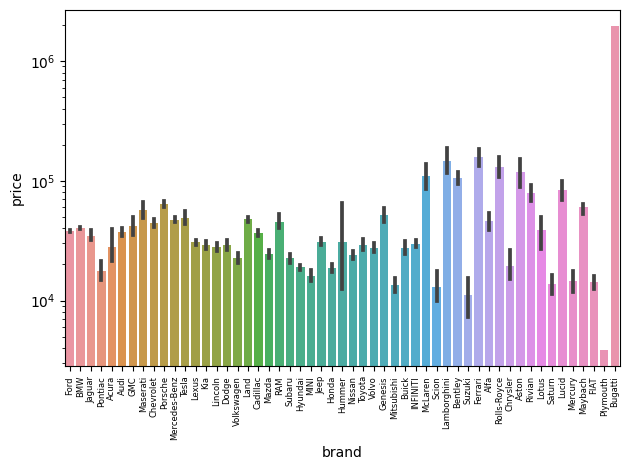

In [107]:
import matplotlib.ticker as ticker
sns.barplot(x = "brand", y = "price", data = new_df)
plt.yscale('log')
plt.xticks(rotation=90)
plt.tick_params(axis='x', which='major', labelsize= 6)
plt.tight_layout()
plt.show()

the price of Bugatti seems to be very high and it maybe an outlier. We must check other outliers

In [108]:
len(new_df)

54273

In [109]:
new_df.sort_values(by = "price", ascending = False)[:50]

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
39761,Chevrolet,Suburban 1500 LTZ,2010,194000,Gasoline,355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Black,At least 1 accident or damage reported,Yes,2954083
37341,Porsche,911 Carrera 4S,2005,28500,Gasoline,355.0HP 3.8L Flat 6 Cylinder Engine Gasoline Fuel,6-Speed M/T,Gray,Black,None reported,Yes,2954083
41065,Chevrolet,Tahoe LT,2017,117780,Gasoline,355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel,A/T,Black,Black,None reported,Yes,2954083
19661,Audi,A7 3.0T Premium Plus,2017,54500,Diesel,3.0L V6 Cylinder Engine Diesel Fuel,8-Speed A/T,Black,Brown,At least 1 accident or damage reported,Yes,2954083
5584,Mercedes-Benz,SL-Class SL500 Roadster,2004,2533,Gasoline,302.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,A/T,White,Beige,None reported,Yes,2954083
7849,GMC,Sierra 1500 SLE Crew Cab,2005,231500,Gasoline,355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel,4-Speed A/T,Red,Beige,At least 1 accident or damage reported,Yes,2954083
14389,GMC,Sierra 1500 SL Crew Cab,2006,231500,Gasoline,295.0HP 5.3L 8 Cylinder Engine Gasoline Fuel,A/T,Red,Gray,None reported,Yes,2954083
7620,Chevrolet,Corvette Base,2005,231581,Gasoline,400.0HP 6.0L 8 Cylinder Engine Gasoline Fuel,4-Speed A/T,Gray,Beige,None reported,Yes,2954083
34049,Acura,RDX PMC Edition,2021,2353,Gasoline,2.0L I4 16V GDI DOHC Turbo,10-Speed Automatic,Red,Ebony,None reported,Yes,2954083
29826,Toyota,Sequoia Limited,2002,17300,Gasoline,381.0HP 5.7L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Gray,At least 1 accident or damage reported,Yes,2954083


In [110]:
new_df = new_df[new_df["price"] <=  749950] # drop values 
new_df

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,F-150 Lariat,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,11000
1,BMW,335 i,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,8250
2,Jaguar,XF Luxury,2009,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,Yes,15000
3,BMW,X7 xDrive40i,2022,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,63500
4,Pontiac,Firebird Base,2001,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,7850
...,...,...,...,...,...,...,...,...,...,...,...,...
54268,BMW,X6 xDrive50i,2017,29000,Gasoline,445.0HP 4.4L 8 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Brown,None reported,Yes,29000
54269,Audi,A4 2.0T Premium,2015,94634,E85 Flex Fuel,220.0HP 2.0L 4 Cylinder Engine Flex Fuel Capab...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,6500
54270,Porsche,Cayenne S,2013,40989,Gasoline,420.0HP 3.6L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Black,At least 1 accident or damage reported,Yes,18950
54271,Porsche,911 Carrera 4 GTS,2023,1518,Gasoline,4.0L H6 24V GDI DOHC,8-Speed Automatic with Auto-Shift,Beige,Brown,None reported,Yes,194965


## Preparing Data For The Model

In [111]:
new_df.shape

(54241, 12)

In [112]:
current_year = 2024
new_df= new_df.assign(age = current_year - new_df["model_year"])

In [113]:
new_df.drop("model_year", axis=1, inplace=True)

In [114]:
new_df

,brand,model,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,age
0,Ford,F-150 Lariat,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,11000,6
1,BMW,335 i,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,8250,17
2,Jaguar,XF Luxury,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,Yes,15000,15
3,BMW,X7 xDrive40i,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,63500,2
4,Pontiac,Firebird Base,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,7850,23
...,...,...,...,...,...,...,...,...,...,...,...,...
54268,BMW,X6 xDrive50i,29000,Gasoline,445.0HP 4.4L 8 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Brown,None reported,Yes,29000,7
54269,Audi,A4 2.0T Premium,94634,E85 Flex Fuel,220.0HP 2.0L 4 Cylinder Engine Flex Fuel Capab...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,6500,9
54270,Porsche,Cayenne S,40989,Gasoline,420.0HP 3.6L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Black,At least 1 accident or damage reported,Yes,18950,11
54271,Porsche,911 Carrera 4 GTS,1518,Gasoline,4.0L H6 24V GDI DOHC,8-Speed Automatic with Auto-Shift,Beige,Brown,None reported,Yes,194965,1


In [115]:
test_data = pd.read_csv("/kaggle/input/kagglex-skill-dataset/test.csv")

In [116]:
X_test = test_data[:]

In [117]:
new_df.drop("model", axis = 1, inplace = True)

In [118]:
X_test = X_test.assign(age = current_year - X_test["model_year"])
X_test.drop("model_year", axis = 1, inplace = True)
X_test.drop("model", axis = 1, inplace = True)

In [119]:
new_df["engine"].unique()[:10]

array(['375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel',
       '300.0HP 3.0L Straight 6 Cylinder Engine Gasoline Fuel',
       '300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel',
       '335.0HP 3.0L Straight 6 Cylinder Engine Gasoline/Mild Electric Hybrid',
       '200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel',
       '140.0HP 1.8L 4 Cylinder Engine Gasoline Fuel',
       '333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel',
       '193.0HP 2.5L 4 Cylinder Engine Gasoline Fuel',
       '200.0HP 2.0L 4 Cylinder Engine Gasoline Fuel',
       '300.0HP 3.7L V6 Cylinder Engine Gasoline Fuel'], dtype=object)

In [120]:
import re

def extract_features(engine_desc):
    
    hp_match = re.search(r'(\d+(\.\d+)?)HP', engine_desc)
    horsepower = float(hp_match.group(1)) if hp_match else None
    
    displacement_match = re.search(r'(\d+(\.\d+)?)L', engine_desc)
    displacement = float(displacement_match.group(1)) if displacement_match else None

    cylinders_match = re.search(r'(\d+(\.\d+)?) Cylinder', engine_desc)
    cylinders = float(cylinders_match.group(1)) if cylinders_match else None

    return horsepower, displacement, cylinders

In [121]:
new_df[['horsepower', 'displacement', 'cylinders']] = new_df['engine'].apply(extract_features).apply(pd.Series)

In [122]:
X_test[['horsepower', 'displacement', 'cylinders']] = X_test['engine'].apply(extract_features).apply(pd.Series)

In [123]:
X_test = X_test.drop("engine", axis = 1)
new_df = new_df.drop("engine", axis = 1)

In [141]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

dff_ = new_df[:]

features = ['horsepower', 'displacement', 'cylinders']
df_features = dff_[features]

df_features = df_features.fillna(df_features.mean())

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_features)

kmeans = KMeans(n_init = 1, n_clusters=3, random_state=42)

dff_['cluster'] = kmeans.fit_predict(df_scaled)

/tmp/ipykernel_33/2971467737.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff_['cluster'] = kmeans.fit_predict(df_scaled)


In [145]:
from sklearn.impute import KNNImputer

def impute_cluster(group):
    imputer = KNNImputer(n_neighbors=2)
    group[features] = imputer.fit_transform(group[features])
    return group

df_imputed = (
    dff_.groupby('cluster')
    .apply(lambda group: impute_cluster(group))
    .reset_index(drop=True)
)

/tmp/ipykernel_33/3456981258.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda group: impute_cluster(group))


In [148]:
X_ = X_test[:]

X_features = X_[features]

X_features = X_features.fillna(X_features.mean())

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_features)

kmeans = KMeans(n_init = 1, n_clusters=3, random_state=42)

X_['cluster'] = kmeans.fit_predict(X_scaled)

/tmp/ipykernel_33/539148929.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_['cluster'] = kmeans.fit_predict(X_scaled)


In [149]:
X_test_imputed = (
    X_.groupby('cluster')
    .apply(lambda group: impute_cluster(group))
    .reset_index(drop=True)
)

/tmp/ipykernel_33/1905705197.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda group: impute_cluster(group))


In [156]:
df_imputed = df_imputed.drop("cluster", axis = 1)

In [158]:
X_test_imputed = X_test_imputed.drop("cluster", axis = 1)

In [163]:
X_test_imputed = X_test_imputed.drop("id", axis = 1)

In [168]:
X_test_imputed.shape

(36183, 12)

In [170]:
X = df_imputed.drop("price", axis = 1)
y = df_imputed["price"]

In [171]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [172]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((43392, 12), (10849, 12), (43392,), (10849,))

In [173]:
X_train

,brand,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,age,horsepower,displacement,cylinders
23622,Ford,17500,Hybrid,A/T,Red,Black,None reported,Yes,2,318.0,3.3,6.0
38100,Ford,50780,Diesel,6-Speed A/T,Blue,Gray,At least 1 accident or damage reported,Yes,7,450.0,6.7,8.0
18215,Volvo,60660,Gasoline,8-Speed A/T,Gray,Black,At least 1 accident or damage reported,Yes,6,316.0,2.0,4.0
13047,Toyota,52000,Gasoline,9-Speed A/T,White,Black,None reported,Yes,4,295.0,3.5,6.0
33404,Nissan,61450,Gasoline,5-Speed M/T,Black,Gray,At least 1 accident or damage reported,Yes,14,122.0,1.8,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11284,Ford,64552,Gasoline,10-Speed A/T,White,Gray,At least 1 accident or damage reported,Yes,6,325.0,2.7,6.0
44732,Chevrolet,72000,Gasoline,A/T,Blue,Beige,None reported,Yes,5,355.0,5.3,8.0
38158,Ford,72000,Diesel,6-Speed A/T,Gray,Black,None reported,Yes,5,450.0,6.7,8.0
860,Toyota,19000,Hybrid,10-Speed A/T,Orange,Black,None reported,Yes,2,437.0,3.4,6.0


### Dealing With Categorical Values

In [187]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43392 entries, 23622 to 15795
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         43392 non-null  object 
 1   milage        43392 non-null  float64
 2   fuel_type     43392 non-null  object 
 3   transmission  43392 non-null  object 
 4   ext_col       43392 non-null  object 
 5   int_col       43392 non-null  object 
 6   accident      43392 non-null  object 
 7   clean_title   43392 non-null  object 
 8   age           43392 non-null  float64
 9   horsepower    43392 non-null  float64
 10  displacement  43392 non-null  float64
 11  cylinders     43392 non-null  float64
dtypes: float64(5), object(7)
memory usage: 4.3+ MB


In [176]:
X_train.columns == X_test_imputed.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [177]:
from sklearn.preprocessing import StandardScaler
num_col = ["milage","age", "horsepower", "displacement", "cylinders"]
scaler = StandardScaler()
X_train[num_col] = scaler.fit_transform(X_train[num_col])
X_val[num_col] = scaler.transform(X_val[num_col])
X_test_imputed[num_col] = scaler.transform(X_test_imputed[num_col])

In [192]:
cat_features_one_hot = ['brand', 'fuel_type', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title'] 

In [195]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output = False, handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train[cat_features_one_hot])
X_val_encoded = encoder.transform(X_val[cat_features_one_hot])
X_test_encoded = encoder.transform(X_test_imputed[cat_features_one_hot])

### Training Model

In [198]:
from sklearn.metrics import mean_squared_error, r2_score

def model_result(model, X_val, y_val):
    y_pred = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_val, y_pred)
    
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"r2_score: {r2}")

In [200]:
import xgboost as xgb 

xgb = xgb.XGBRegressor()
xgb.fit(X_train_encoded, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [204]:
model_result(xgb, X_train_encoded, y_train)
model_result(xgb, X_val_encoded, y_val)

MSE: 1368355167.3329737
RMSE: 36991.28501867668
r2_score: 0.3196819067155007
MSE: 1624572109.2072742
RMSE: 40305.98105997762
r2_score: 0.14691195988275074


In [208]:
import lightgbm as lgb

lgb = lgb.LGBMRegressor()
lgb.fit(X_train_encoded, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005218 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 268
[LightGBM] [Info] Number of data points in the train set: 43392, number of used features: 134
[LightGBM] [Info] Start training from score 37941.887329


LGBMRegressor()

In [209]:
model_result(lgb, X_train_encoded, y_train)
model_result(lgb, X_val_encoded, y_val)

MSE: 1542285654.5075848
RMSE: 39271.944878088034
r2_score: 0.23320723974047408
MSE: 1519614439.6980276
RMSE: 38982.232359089285
r2_score: 0.20202686187414842


In [ ]:
print("Best parameters found: ", random_search.best_params_)
print("Best RMSE found: ", np.sqrt(-random_search.best_score_))

In [216]:
import tensorflow as tf

training_data = tf.data.Dataset.from_tensor_slices((X_train_encoded, y_train))
validation_data = tf.data.Dataset.from_tensor_slices((X_val_encoded, y_val))

batch_size = 32
auto = tf.data.AUTOTUNE 

train_data = training_data.batch(batch_size, num_parallel_calls = auto).cache().prefetch(buffer_size = auto)
val_data = validation_data.batch(batch_size, num_parallel_calls = auto).cache().prefetch(buffer_size = auto)

2024-06-08 11:33:41.430107: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-08 11:33:41.430253: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-08 11:33:41.579594: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [254]:
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape = (478,)),
    tf.keras.layers.Dense(128, activation = "relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)
])

model.summary()

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 5, restore_best_weights = True, verbose = 1)

model.compile(loss = tf.keras.losses.MeanSquaredError(),
              optimizer = tf.keras.optimizers.Adam())

model.fit(train_data, epochs = 200, validation_data = val_data, callbacks=[early_stopping])

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                │ (None, 128)            │        61,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 69,633 (272.00 KB)

 Trainable params: 69,633 (272.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
1356/1356 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 2754502656.0000 - val_loss: 1780164224.0000
Epoch 2/200
1356/1356 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1756276864.0000 - val_loss: 1689618432.0000
Epoch 3/200
1356/1356 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1688686080.0000 - val_loss: 1651938688.0000
Epoch 4/200
1356/1356 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1656191616.0000 - val_loss: 1630690944.0000
Epoch 5/200
1356/1356 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1635583872.0000 - val_loss: 1616139264.0000
Epoch 6/200
1356/1356 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1622200448.0000 - val_loss: 1604788224.0000
Epoch 7/200
1356/1356 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1610985728.0000 - val_loss: 1595074304.0000
Epoch 8/200
1356/1356 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1604912768.0000 - val_loss: 1586047744.0000
Epoch 9/200
1356/1356 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1592652416.0000 - val_loss: 1577420288.0000
Epoch 10/200
1356/1356 ━━━━━━━━━━━━━━

In [234]:
y_pred = model.predict(X_val_encoded)

340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [242]:
y_pred

array([[61818.09 ],
       [15938.352],
       [24404.934],
       ...,
       [59617.234],
       [69001.54 ],
       [42095.28 ]], dtype=float32)

In [245]:
predictions = np.round(y_pred).astype(int)

In [249]:
mse = mean_squared_error(y_val, predictions)
rmse = np.sqrt(mse)

mse, rmse

(1516421164.598304, 38941.25273534872)

In [255]:
model_result(model, X_val_encoded, y_val)

340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
MSE: 1514644639.1253653
RMSE: 38918.435723001065
r2_score: 0.2046365813235208


In [258]:
model2 = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=(478,)),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)
])

model2.summary()


early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6, verbose=1)

model2.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=tf.keras.optimizers.Adam())

model2.fit(train_data, epochs=200, validation_data=val_data,
          callbacks=[early_stopping, lr_scheduler])

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_32 (Dense)                │ (None, 128)            │        61,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 72,193 (282.00 KB)

 Trainable params: 72,193 (282.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
1356/1356 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 2256586240.0000 - val_loss: 1621271168.0000 - learning_rate: 0.0010
Epoch 2/200
1356/1356 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1638029952.0000 - val_loss: 1570927232.0000 - learning_rate: 0.0010
Epoch 3/200
1356/1356 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1595184512.0000 - val_loss: 1544692864.0000 - learning_rate: 0.0010
Epoch 4/200
1356/1356 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1567744768.0000 - val_loss: 1527597824.0000 - learning_rate: 0.0010
Epoch 5/200
1356/1356 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1548074880.0000 - val_loss: 1522012416.0000 - learning_rate: 0.0010
Epoch 6/200
1356/1356 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1539388416.0000 - val_loss: 1518504704.0000 - learning_rate: 0.0010
Epoch 7/200
1356/1356 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1537161088.0000 - val_loss: 1519219840.0000 - learning_rate: 0.0010
Epoch 8/200
1356/1356 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1530685824.0000 - va

In [259]:
model_result(model2, X_val_encoded, y_val)

340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
MSE: 1514089645.024828
RMSE: 38911.30484865328
r2_score: 0.20492801734339383
